# **API TheSportsDB**

# Revisando el cronograma de partidos de futbol disponibles

In [35]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
# Usamos el id mostrado para elegir la categoria futbol de Reino Unido
url = "https://www.thesportsdb.com/api/v1/json/3/eventsnext.php?id=133602"
response = requests.get(url)

print("Status code:", response.status_code)


Status code: 200


In [37]:
# Comprobamos que se ejecuto correctamente y convertimos a python
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud")


In [38]:
# Se muestran los eventos disponibles
events = data.get("events", [])
print(events)

[{'idEvent': '2274884', 'idAPIfootball': '1387353', 'strEvent': 'Wycombe Wanderers vs Bolton Wanderers', 'strEventAlternate': 'Bolton Wanderers @ Wycombe Wanderers', 'strFilename': 'English League 1 2025-12-20 Wycombe Wanderers vs Bolton Wanderers', 'strSport': 'Soccer', 'idLeague': '4396', 'strLeague': 'English League 1', 'strLeagueBadge': 'https://r2.thesportsdb.com/images/media/league/badge/afedb31688770443.png', 'strSeason': '2025-2026', 'strDescriptionEN': None, 'strHomeTeam': 'Wycombe Wanderers', 'strAwayTeam': 'Bolton Wanderers', 'intHomeScore': None, 'intRound': '21', 'intAwayScore': None, 'intSpectators': None, 'strOfficial': '', 'strTimestamp': '2025-12-20T15:00:00', 'dateEvent': '2025-12-20', 'dateEventLocal': None, 'strTime': '15:00:00', 'strTimeLocal': None, 'strGroup': None, 'idHomeTeam': '134382', 'strHomeTeamBadge': 'https://r2.thesportsdb.com/images/media/team/badge/avi3bu1688678934.png', 'idAwayTeam': '133606', 'strAwayTeamBadge': 'https://r2.thesportsdb.com/images/me

In [28]:
# Seleccionamos los datos importantes de cada partido disponible y lo colocamos en un data frame
events_data = []

for event in events:
    events_data.append({
        "Evento": event.get("strEvent"),
        "Deporte": event.get("strSport"),
        "Liga": event.get("strLeague"),
        "Fecha": event.get("dateEvent"),
        "Hora": event.get("strTime")
    })

df = pd.DataFrame(events_data)
df


,Evento,Deporte,Liga,Fecha,Hora
0,Wycombe Wanderers vs Bolton Wanderers,Soccer,English League 1,2025-12-20,15:00:00
1,Bolton Wanderers vs Rotherham United,Soccer,English League 1,2025-12-26,15:00:00
2,Bolton Wanderers vs Mansfield Town,Soccer,English League 1,2025-12-29,19:45:00
3,Doncaster Rovers vs Bolton Wanderers,Soccer,English League 1,2026-01-01,15:00:00
4,Bolton Wanderers vs Northampton Town,Soccer,English League 1,2026-01-04,12:00:00
5,Peterborough United vs Bolton Wanderers,Soccer,English League 1,2026-01-10,15:00:00
6,Bolton Wanderers vs Port Vale,Soccer,EFL Trophy,2026-01-13,00:00:00
7,Wigan Athletic vs Bolton Wanderers,Soccer,English League 1,2026-01-17,12:30:00
8,Stevenage vs Bolton Wanderers,Soccer,English League 1,2026-01-20,19:45:00
9,Bolton Wanderers vs Leyton Orient,Soccer,English League 1,2026-01-24,15:00:00


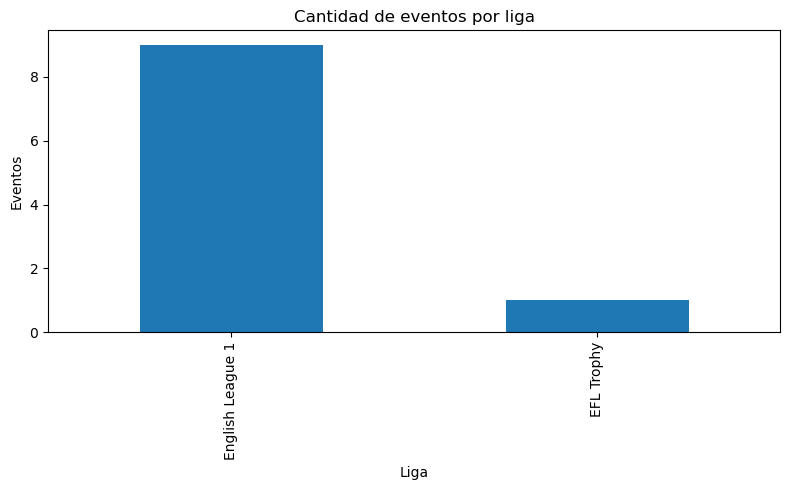

In [29]:
# Graficamos
plt.figure(figsize=(8,5))
df["Liga"].value_counts().plot(kind="bar")
plt.title("Cantidad de eventos por liga")
plt.ylabel("Eventos")
plt.xlabel("Liga")
plt.tight_layout()
plt.show()


# Revisamos los partidos de futbol y basquet disponibles

In [32]:
# Usamos el id de cada uno de estos deportes y los juntamos
sports_ids = {
    "Fútbol": 133602,
    "Baloncesto": 4387
}

all_events = []

for sport, sport_id in sports_ids.items():
    url = f"https://www.thesportsdb.com/api/v1/json/3/eventsnext.php?id={sport_id}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        events = data.get("events", [])

        for event in events:
            all_events.append({
                "Deporte": sport,
                "Evento": event.get("strEvent"),
                "Fecha": event.get("dateEvent")
            })

df = pd.DataFrame(all_events)
df


,Deporte,Evento,Fecha
0,Fútbol,Wycombe Wanderers vs Bolton Wanderers,2025-12-20
1,Fútbol,Bolton Wanderers vs Rotherham United,2025-12-26
2,Fútbol,Bolton Wanderers vs Mansfield Town,2025-12-29
3,Fútbol,Doncaster Rovers vs Bolton Wanderers,2026-01-01
4,Fútbol,Bolton Wanderers vs Northampton Town,2026-01-04
5,Fútbol,Peterborough United vs Bolton Wanderers,2026-01-10
6,Fútbol,Bolton Wanderers vs Port Vale,2026-01-13
7,Fútbol,Wigan Athletic vs Bolton Wanderers,2026-01-17
8,Fútbol,Stevenage vs Bolton Wanderers,2026-01-20
9,Fútbol,Bolton Wanderers vs Leyton Orient,2026-01-24


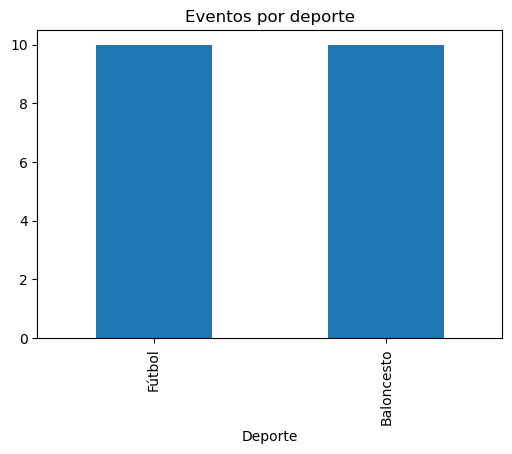

In [33]:
# Grafico del numero de eventos
df["Deporte"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Eventos por deporte")
plt.show()
